In [17]:
import pandas as pd 
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
import numpy as np
from sklearn.preprocessing import MinMaxScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [18]:
df = pd.read_csv("Final.csv")
df = df.drop(columns=["Unnamed: 0","online_order","past_3_years_bike_related_purchases","transaction_month"], axis =1)
pd.set_option("display.max_columns",100)

In [20]:
df = df[["brand","gender","age","job_title","owns_car","tenure","state","property_valuation","profit"]]
df.head()

,brand,gender,age,job_title,owns_car,tenure,state,property_valuation,profit
0,Solex,M,66.0,Software Engineer I,Yes,10.0,VIC,6.0,17.87
1,Giant Bicycles,M,66.0,Software Engineer I,Yes,10.0,VIC,6.0,448.68
2,Solex,M,66.0,Software Engineer I,Yes,10.0,VIC,6.0,179.44
3,Trek Bicycles,F,42.0,Clinical Specialist,Yes,10.0,NSW,5.0,1702.55
4,Giant Bicycles,F,42.0,Clinical Specialist,Yes,10.0,NSW,5.0,451.65


In [21]:
categorical_variables = df.select_dtypes(include=["object"]).columns.to_list()
numerical_variables = df.select_dtypes(include = ["float64"]).columns.to_list()

In [22]:
column_transform = ColumnTransformer(transformers = [("catToNum", OneHotEncoder(), categorical_variables), ("scaleNum",MinMaxScaler(),numerical_variables)])  # handle_unknown='ignore' for OHE

In [23]:
df = df.dropna()

In [ ]:
wcss = {}
for k in range(2,20):
    model = KMeans(n_clusters = k, init = "k-means++", n_init =10, max_iter = 500)
    pipe = Pipeline(steps = [("ColumnTransformer",column_transform),("MlAlgorithm",model)])
    kmeans = pipe.fit(df)
    wcss[k] = kmeans["MlAlgorithm"].inertia_

In [ ]:
wcssDF = pd.DataFrame.from_dict(wcss, orient = "index")
wcssDF.plot()

In [ ]:
wcss = {}
for k in range(20,30):
    model = KMeans(n_clusters = k, init = "k-means++", n_init =10, max_iter = 500)
    pipe = Pipeline(steps = [("ColumnTransformer",column_transform),("MlAlgorithm",model)])
    kmeans = pipe.fit(df)
    wcss[k] = kmeans["MlAlgorithm"].inertia_

In [ ]:
wcssDF = pd.DataFrame.from_dict(wcss, orient = "index")
wcssDF.plot()

In [9]:
model = KMeans(n_clusters = 4, init = "k-means++", n_init =10, max_iter = 1000)
pipe = Pipeline(steps = [("ColumnTransformer",column_transform),("MlAlgorithm",model)])
kmeans = pipe.fit(df)

In [10]:
kmeans["MlAlgorithm"].labels_

array([0, 0, 0, ..., 1, 3, 3])

In [11]:
df["label"] = kmeans["MlAlgorithm"].labels_

Index(['brand', 'product_line', 'product_class', 'product_size', 'gender',
       'age', 'job_title', 'job_industry_category', 'wealth_segment',
       'owns_car', 'tenure', 'state', 'property_valuation', 'profit', 'label'],
      dtype='object')

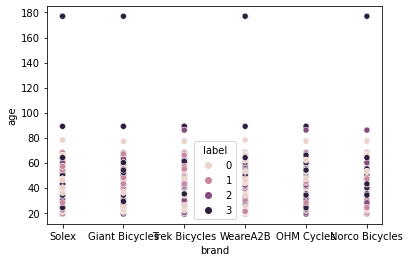

In [14]:
sns.scatterplot(x="brand",y="age",hue="label",data = df)
df.columns

In [ ]:
# df[categorical_variables+["label"]].groupby("label").agg(["mean"]).T
# df[categorical_variables+["label"]].groupby("label").mode()
# df.groupby(['label']).agg(lambda x:x.value_counts().index[0])

# K-Prototype

In [ ]:
# df = pd.read_csv("Final.csv")
# df = df.drop(columns=["Unnamed: 0"], axis =1)
# df = df.dropna()
# df.head(0)

In [ ]:
# cat = df.select_dtypes(include = ["object"]).columns
# categoical_indices = []
# for column in df.columns.to_list():
#     categoical_columns.append(df.columns.get_loc(column))

